# 數據的預處理

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

# 讓圖形在jupyter notebook裡直接顯示
%matplotlib inline

In [3]:
# matplotlib的圖形比較單調，如果需要多一點的變化，需要import seaborn
import seaborn as sns

sns.set()

In [4]:
plt.rcParams["font.family"] = "STXIHEI"

In [5]:
# 如果需要使用statsmodels, 可以考慮用api接口簡化後再調用
import statsmodels.api as sm

In [6]:
from sklearn import datasets

boston = datasets.load_boston()

C:\Users\sarbb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [7]:
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)

# 2.1_數據的標準化

#### 數據標準化可以去除均數、離散程度量綱差異太大的影響
    
        減去均數：去除均數的影響。
        除以標準差：去除離散程度的影響。
        
#### 但是標準化對離群值的影響無能為力，其結果仍然受離群值的嚴重影響。

## 2.1.1 對單個數據進行標化
sklearn.preprocessing.scale(
    
    X : {array-like, sparse matrix},需要進行變換的數據陣
    axis = 0 : 指定分別按照列(0)還是整個樣本(1)計算均數、標準差並進行變換
    with_mean = True : 是否中心化數據 (移除均數)
    with_std = True : 是否均一化標準差 (除以標準差)
    copy = True : 是否生成副本而不是替換原數據

)

In [8]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(bostondf)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [11]:
# 計算轉換後的均數和標準差
print(pd.DataFrame(X_scaled.mean(axis = 0)))   # 指令碼「print(pd.DataFrame())」這段是轉成數據框，裡面的code才是重點
print(pd.DataFrame(X_scaled.std(axis = 0)))    # axis = 0，以column為視角去執行，因為共有13個column，所以共有13個值

               0
0  -8.787437e-17
1  -6.343191e-16
2  -2.682911e-15
3   4.701992e-16
4   2.490322e-15
5  -1.145230e-14
6  -1.407855e-15
7   9.210902e-16
8   5.441409e-16
9  -8.868619e-16
10 -9.205636e-15
11  8.163101e-15
12 -3.370163e-16
      0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10  1.0
11  1.0
12  1.0


In [12]:
# 對整個矩陣統一做標準化
X_scaled1 = preprocessing.scale(bostondf, axis = 1)
pd.DataFrame(X_scaled1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.503522,-0.358257,-0.484924,-0.503573,-0.499229,-0.450492,0.022791,-0.470554,-0.495500,1.886055,-0.380055,2.700628,-0.463369
1,-0.503488,-0.503722,-0.443258,-0.503722,-0.499711,-0.448808,0.171048,-0.461242,-0.486618,1.565915,-0.351493,2.890654,-0.425555
2,-0.490017,-0.490252,-0.429318,-0.490252,-0.486210,-0.428327,0.036345,-0.447442,-0.473015,1.595451,-0.336841,2.895396,-0.455519
3,-0.473059,-0.473343,-0.454255,-0.473343,-0.469333,-0.412071,-0.072335,-0.420264,-0.447076,1.470405,-0.309613,2.981888,-0.447601
4,-0.479946,-0.480548,-0.461529,-0.480548,-0.476552,-0.418194,-0.007682,-0.427659,-0.454375,1.456285,-0.317401,2.982195,-0.434047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.505849,-0.506373,-0.406635,-0.506373,-0.501583,-0.451254,0.071321,-0.485651,-0.498013,1.775979,-0.330807,2.770767,-0.425529
502,-0.508336,-0.508711,-0.409923,-0.508711,-0.503966,-0.458033,0.126417,-0.489769,-0.500431,1.751914,-0.334817,2.777890,-0.433523
503,-0.514356,-0.514858,-0.416309,-0.514858,-0.510125,-0.457232,0.236860,-0.496953,-0.506598,1.740295,-0.341385,2.763788,-0.468268
504,-0.514658,-0.515569,-0.416367,-0.515569,-0.510804,-0.459075,0.226993,-0.495705,-0.507254,1.754526,-0.340946,2.756113,-0.461686


In [13]:
X_scaled1.mean(axis = 0), X_scaled1.std(axis = 0)

(array([-0.4780112 , -0.40553476, -0.42254267, -0.49773735, -0.49427398,
        -0.45178493, -0.01134041, -0.46893722, -0.43835293,  2.28303321,
        -0.36385904,  2.159172  , -0.40983071]),
 array([0.06425559, 0.18342798, 0.0560845 , 0.03195557, 0.03193079,
        0.03022877, 0.19077168, 0.03244151, 0.06559356, 0.60447227,
        0.03530255, 0.83087432, 0.05416801]))

In [14]:
X_scaled1.mean(), X_scaled1.std()

(-7.392485326631476e-18, 1.0)

In [15]:
# scale 函數也可以直接對單列的因變量做標準化
pd.DataFrame(preprocessing.scale(boston.target)) # 對preprocessing.scale(boston.target)做標準化

,0
0,0.159686
1,-0.101524
2,1.324247
3,1.182758
4,1.487503
...,...
501,-0.014454
502,-0.210362
503,0.148802
504,-0.057989


## 2.1.2 在多個數據集上使用相同的標準化變換
#### 使用API接口，可以將標準化變換方法設置為可調用的函數，每次直接調用即可。

#### class sklearn.preprocessing.StandardScaler(
        
        copy = True : 是否生成副本而不是替換原對象
        with_mean = True
        with_std = True
#### )
        
#### StandardScaler類的屬性：

        scale_ : ndarray,shape (n_features,)
        mean_ : array of floats with shape [n_features]
        var_ : array of floats with shape [n_features]
        n_samples_seen_ : int
        
#### StandardScaler類的方法：

        inverse_transform(X[, copy]) : 將數據進行逆變換
        partial_fix(X[, y]) : 在線計算數據特徵用於後續擬合
        
        fit(X[, y]) : 計算數據特徵用於後續擬合
        transform(X[, y, copy]) : 使用模型設定進行轉換
        fit_transform(X[, y]) : 計算數據特徵，並且進行轉換
        get_params([deep]) : 獲取模型的參數設定
        set_params(**params) : 設置模型參數
      

In [16]:
std = preprocessing.StandardScaler()
std.fit(bostondf)
std.mean_, std.scale_
# 可以看出平均值、標準差趨近於0

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [17]:
pd.DataFrame(std.transform(bostondf))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


## 2.1.3 將特徵縮放至特定範圍

#### 常見的操作是將數據轉換至0~1之間，也可以將每個特徵的最大絕對值轉換至指定數值大小。

#### 此類方法仍然對離群值非常敏感

#### 此類方法的基本用途：

        放大方差極小的特徵，使其在特徵選擇時能保留在模型中。
        聚類分析中常見的數據預處理方式之一。
        實現特徵極小方差的穩健性，或者在稀疏矩陣中保留零元素。
        

#### class sklearn.preprocessing.MinMaxScaler(feature_range = (0,1), copy = True)
        
        copy = True : 是否生成副本而不是替換原對象
        
#### class sklearn.preprocessing.MaxAbsScaler(copy = True)

        將數據的最大值縮放至1
        


In [18]:
scaler = preprocessing.MinMaxScaler((1 , 10))
pd.DataFrame(scaler.fit_transform(bostondf))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,2.62,1.610337,1.0,3.833333,6.197547,6.774459,3.422828,1.000000,2.872137,3.585106,10.000000,1.807119
1,1.002123,1.00,3.180718,1.0,2.555556,5.931979,8.044284,4.140658,1.391304,1.944656,5.978723,10.000000,2.840232
2,1.002121,1.00,3.180718,1.0,2.555556,7.249473,6.394439,4.140658,1.391304,1.944656,5.978723,9.907635,1.571192
3,1.002635,1.00,1.567449,1.0,2.351852,6.926998,4.976313,5.036901,1.782609,1.601145,6.840426,9.948485,1.300497
4,1.006346,1.00,1.567449,1.0,2.351852,7.183943,5.754892,5.036901,1.782609,1.601145,6.840426,10.000000,1.894040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.005696,1.00,4.784091,1.0,4.481481,6.228588,7.135942,2.104038,1.000000,2.477099,9.042553,9.888572,2.971854
502,1.003940,1.00,4.784091,1.0,4.481481,5.412914,7.840371,1.947640,1.000000,2.477099,9.042553,10.000000,2.825331
503,1.005507,1.00,4.784091,1.0,4.481481,6.889059,9.165808,1.849430,1.000000,2.477099,9.042553,10.000000,1.971026
504,1.010447,1.00,4.784091,1.0,4.481481,6.575206,9.008239,2.030627,1.000000,2.477099,9.042553,9.921706,2.179636


## 2.1.4 數據的正則化

#### 正則化(Normalization) / 歸一化/範數化  是機器學習領域登出的基於向量空間模型上的一個轉換，經常被使用在分類與聚類中。

#### sklearn.preprocessing.normalize(
        
        X, axis = 1, copy = True
        norm = 'l2' : 'l1', 'l2', or 'max'。 用於正則化的具體範數
        return_norm = False : 是否返回所使用的範數
#### )

#### class sklearn.preprocessing.Normalizer(norm = 'l2', copy = True)
        
        該類獨立對待每個樣本，其fit方法實際不做任何事情

In [19]:
X = [[-1., -1., 2.]]
X_normalized = preprocessing.normalize(X, norm='l2', return_norm = True)

X_normalized

(array([[-0.40824829, -0.40824829,  0.81649658]]), array([2.44948974]))

In [20]:
-1 / 2.44948974

-0.408248290927726

# 2.2_考慮異常分布的標準化方法

## 2.2.1 穩健標準化

##### 減的是『中位數』，除的是quantile_range  -> 是用在有『離群值』的資料，如果沒有『離群值』，使用一般的標準化就可以了

#### 將中位數和百分位數 (默認使用四分位間距) 分別代替均數和標準差用於數據的標準化。

        更適合於已知有離群值的數據。

#### sklearn.preprocessing.robust_scale(
        
        X, axis = 0, with_centering = True, with_scaling = True
        quantile_range = (25.0, 75.0) : 用於計算離散程度的百分位數
        copy = True
        
#### )

#### class sklearn.preprocessing.RobustScaler(
        
        with_centering = True, with_scaling = True,
        quantile_range = (25.0, 75.0) , copy = True
        
#### )

In [21]:
rscaler = preprocessing.RobustScaler()
rs = rscaler.fit_transform(bostondf)
pd.DataFrame(rs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


In [22]:
np.median(rs, axis = 0), rs.mean(axis = 0), rs.std(axis = 0)
# 可以看出中位數趨近於0，但平均值、標準差變化大

(array([-7.69783542e-18,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.19910243e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.86877377e-17]),
 array([ 0.93379097,  0.90909091,  0.11206651,  0.06916996,  0.09540034,
         0.10316313, -0.1819592 ,  0.1902672 ,  0.22747036,  0.20216319,
        -0.21230943, -1.66763249,  0.1292417 ]),
 array([2.39025083, 1.86395166, 0.53087301, 0.25374293, 0.66150352,
        0.95111452, 0.57331361, 0.68117165, 0.43493256, 0.43506588,
        0.77243043, 4.37484626, 0.71304364]))

## 2.2.2 分位數轉換

#### 當數據分布嚴重異常時，可以考慮對原始數據做『秩變換』，用『秩次 / 百分位點』代替原變量值進行後續分析。

        通過損失部分信息的辦法解決分布異常問題。
        sklearn文檔中將此方法稱為非線性轉換

#### sklearn.preprocessing.QuantileTransformer(
        
        n_quantiles = 1000 : int, 希望計算的分位數總數 (切成1000分位的概念)
        output_distribution = 'uniform' : str, 轉換後指標服從的分佈
            {'uniform', 'normal'}
        
        下面這三個參數少調整，只有在『大數據時』才會考慮
        ignore_implicit_zeros = False, subsample = 100000
        random_state = None : 隨機種子的數值
        copy = True
        
#### )


In [23]:
QT = preprocessing.QuantileTransformer(n_quantiles = 506)
qtres = QT.fit_transform(bostondf)
pd.DataFrame(qtres)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.758416,0.069307,0.0,0.514851,0.730693,0.395050,0.637624,0.000000,0.317822,0.144554,1.000000,0.120792
1,0.047525,0.000000,0.397030,0.0,0.296040,0.645545,0.512871,0.731683,0.062376,0.109901,0.319802,1.000000,0.370297
2,0.045545,0.000000,0.397030,0.0,0.296040,0.907921,0.366337,0.731683,0.062376,0.109901,0.319802,0.556436,0.065347
3,0.065347,0.000000,0.053465,0.0,0.269307,0.873267,0.260396,0.831683,0.123762,0.049505,0.473267,0.649505,0.011881
4,0.219802,0.000000,0.053465,0.0,0.269307,0.897030,0.320792,0.831683,0.123762,0.049505,0.473267,1.000000,0.145545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.198020,0.000000,0.586139,0.0,0.592079,0.736634,0.425743,0.366337,0.000000,0.199010,0.937624,0.514851,0.411881
502,0.126733,0.000000,0.586139,0.0,0.592079,0.425743,0.492079,0.308911,0.000000,0.199010,0.937624,1.000000,0.364356
503,0.186139,0.000000,0.586139,0.0,0.592079,0.865347,0.680198,0.277228,0.000000,0.199010,0.937624,1.000000,0.162376
504,0.322772,0.000000,0.586139,0.0,0.592079,0.814851,0.653465,0.336634,0.000000,0.199010,0.937624,0.595050,0.211881


<AxesSubplot:>

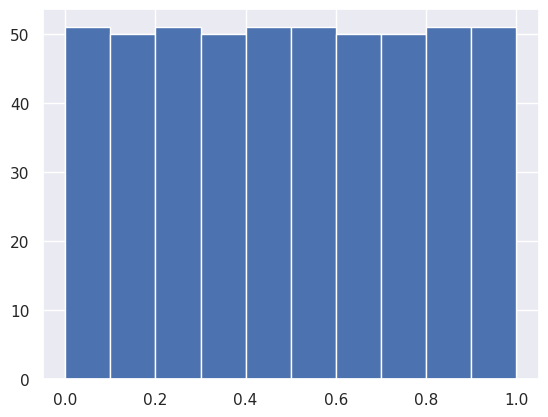

In [30]:
pd.DataFrame(qtres)[0].hist()